# Project: Diamond Pricing

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [3]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('diamonds.csv')
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


## Data Integrity Check

In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


The dataset has almost 54,000 observations.
There are no missing data and the data types are appropriate.

## Exploratory Data Analysis

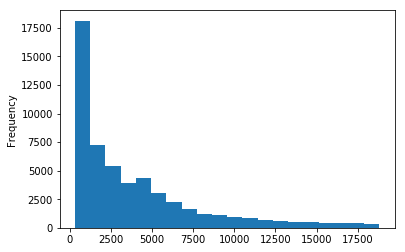

In [7]:
df.price.plot(kind='hist', bins=20);

The price distribution is highly skewed to the right, with extremely high values. Let's try transforming it into the log10 scale:

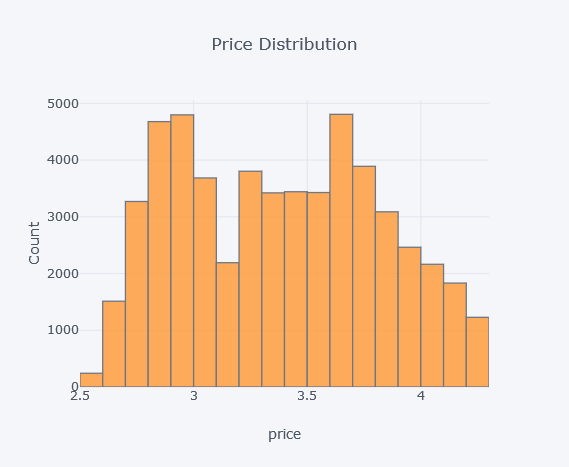

In [8]:
np.log10(df.price).iplot(kind='hist', title='Price Distribution',
              xTitle='price', yTitle='Count', bins=30)

In [9]:
# Peaks of price
print(10**2.8, 10** 3)
print(10**3.6, 10**3.7)

630.957344480193 1000
3981.0717055349733 5011.872336272725


There are two peaks in price:
+ One between 600 and 1,000
+ Another between 4,000 and 5,000

AttributeError: Unknown property title

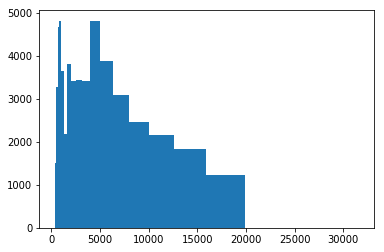

In [10]:
bins = 10** np.arange(2.5, 4.5 +0.1, 0.1)
plt.hist(df.price, bins=bins, title='Price Distribution')
plt.xscale('log')
log_ticks = [300,1000, 3000,10_000, 30_000]
plt.xticks(log_ticks, log_ticks);